In [1]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cardio_train.csv',sep=';')
df.head(50)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [3]:
df.shape

(69301, 13)

In [4]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.describe(include='all')
#it describe all the main information like count , mean of the dataset , max and min value and standard deviation.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df['gender'].unique()
#it shows yhe unique values of that particular column.

array([1, 2], dtype=int64)

In [9]:
df['smoke'].unique()

array([0, 1], dtype=int64)

In [10]:
df['cholesterol'].unique()

array([2, 1, 3], dtype=int64)

In [11]:
df['gluc'].unique()

array([2, 1, 3], dtype=int64)

In [12]:
df['age']=df['age']/365


In [13]:
df.head(50)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0
5,995,57.926027,1,164,61.0,100,70,1,1,0,0,1,0
6,996,49.547945,1,162,72.0,100,70,1,1,0,0,1,0
7,997,61.772603,1,161,93.0,140,90,2,1,0,0,1,1
8,999,58.219178,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,61.495890,1,158,65.0,140,90,3,1,0,0,1,1


In [14]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


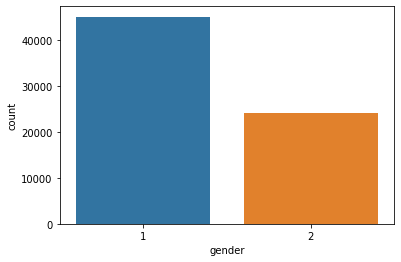

In [15]:
sns.countplot(x='gender',data=df)

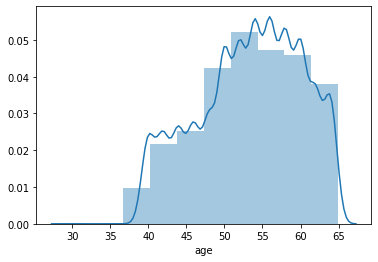

In [16]:
sns.distplot(df['age'],bins=10)


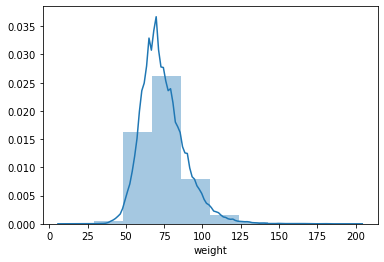

In [17]:
sns.distplot(df['weight'],bins=10)


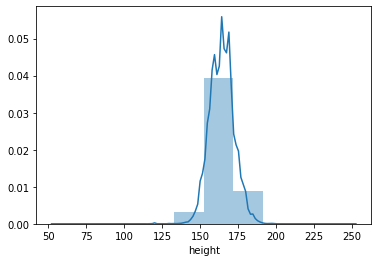

In [18]:
sns.distplot(df['height'],bins=10)


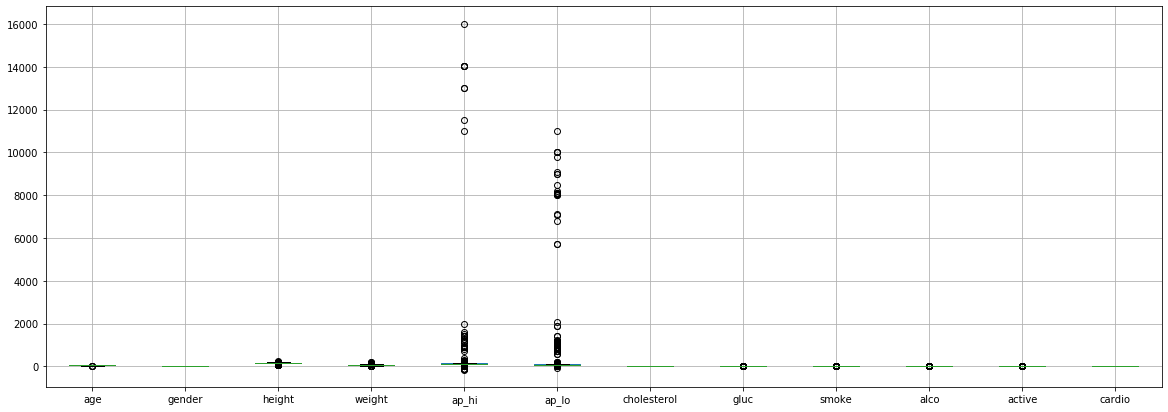

In [19]:
df.boxplot(figsize=(20,7))

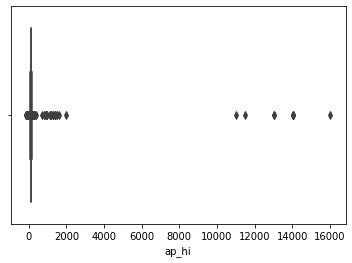

In [20]:
sns.boxplot(df['ap_hi'])

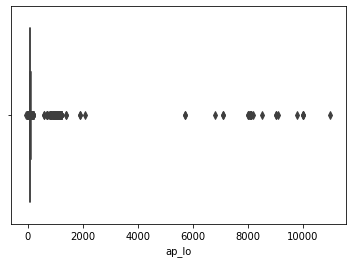

In [21]:
sns.boxplot(df['ap_lo'])

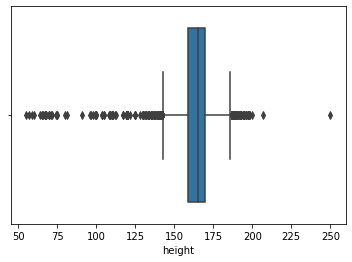

In [22]:
sns.boxplot(df['height'])

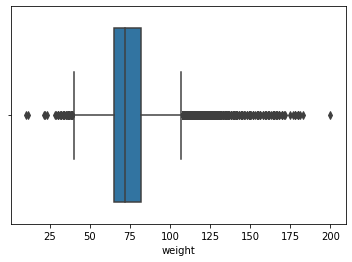

In [23]:
sns.boxplot(df['weight'])

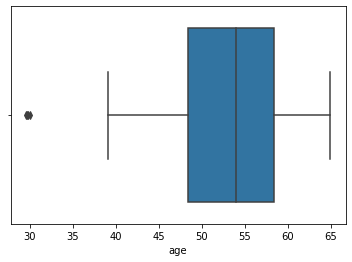

In [24]:
sns.boxplot(df['age'])

In [25]:
def remove_outlier(df_in, col_name, thres=1.5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    mask = (df_in[col_name] > fence_high) | (df_in[col_name] < fence_low)
    df_in.loc[mask, col_name] = np.nan
    return df_in

In [26]:
remove_outlier(df,'ap_hi')
remove_outlier(df,'ap_lo')
remove_outlier(df,'height')
remove_outlier(df,'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0
1,40.131507,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1
2,60.002740,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0
3,39.860274,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0
4,64.090411,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0
5,57.926027,1,164.0,61.0,100.0,70.0,1,1,0,0,1,0
6,49.547945,1,162.0,72.0,100.0,70.0,1,1,0,0,1,0
7,61.772603,1,161.0,93.0,140.0,90.0,2,1,0,0,1,1
8,58.219178,1,157.0,68.0,110.0,80.0,1,1,0,0,1,0
9,61.495890,1,158.0,65.0,140.0,90.0,3,1,0,0,1,1


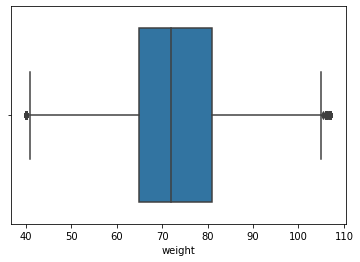

In [27]:
sns.boxplot(df['weight'])

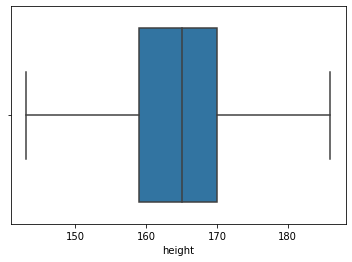

In [28]:
sns.boxplot(df['height'])

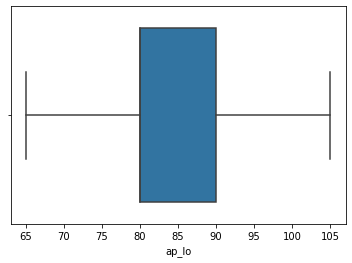

In [29]:
sns.boxplot(df['ap_lo'])

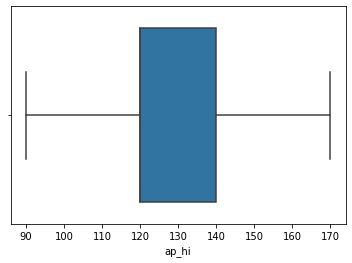

In [30]:
sns.boxplot(df['ap_hi'])

In [31]:
df.isnull().sum()

age               0
gender            0
height          515
weight         1802
ap_hi          1419
ap_lo          4584
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [32]:
df['height'].fillna(df['height'].median(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['ap_hi'].fillna(df['ap_hi'].mean(), inplace=True)
df['ap_lo'].fillna(df['ap_lo'].mean(), inplace=True)

In [33]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F59A82438>,
      dtype=object)

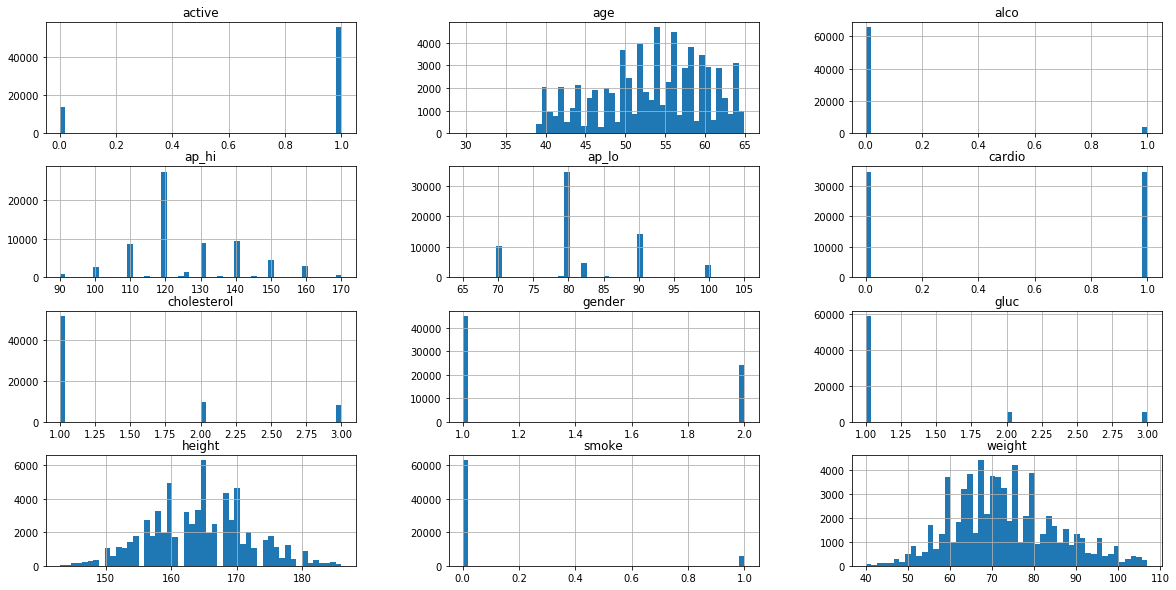

In [34]:
df.hist(bins=50,figsize=(20,10))

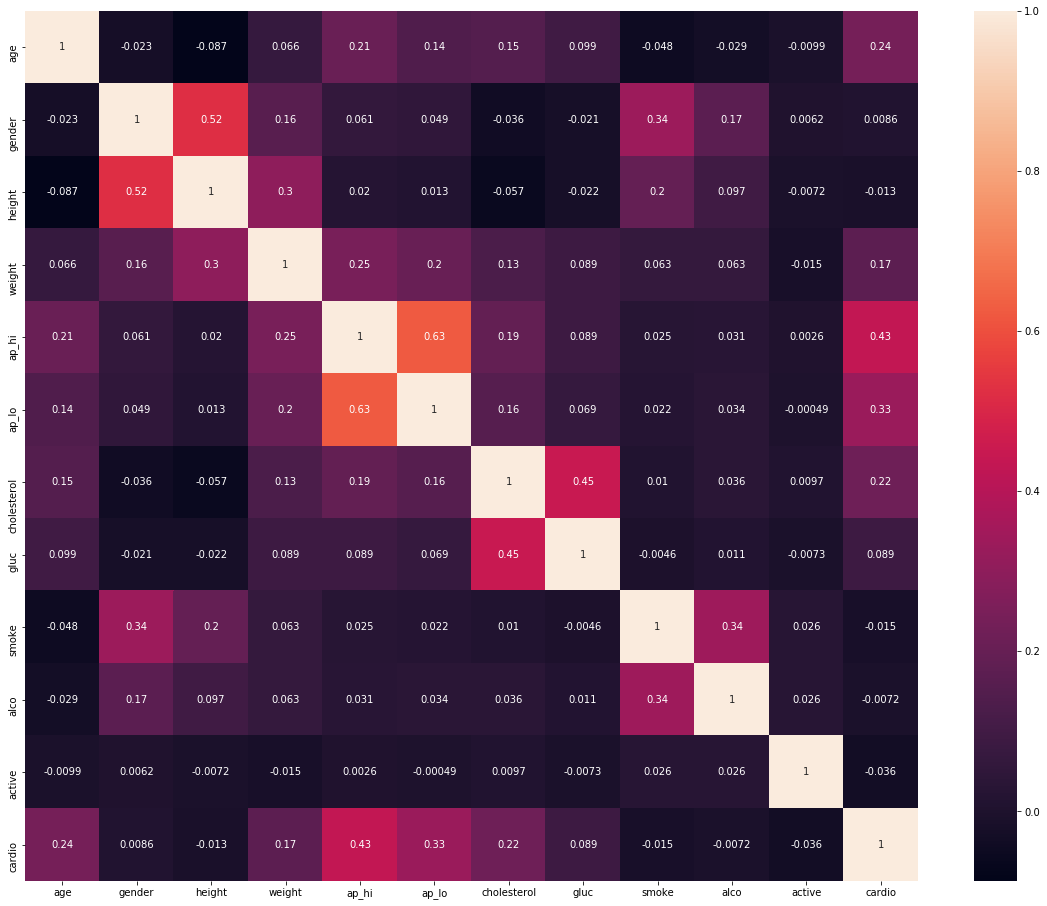

In [35]:
corr_hmap=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [36]:
#the code below gives the distinct values count of dataframe 
count_classes=pd.value_counts(df['cardio'],sort=True)
count_classes

0    34679
1    34622
Name: cardio, dtype: int64

In [37]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

[0.29494954 0.01108866 0.17034715 0.18587318 0.16788914 0.0897979
 0.03975677 0.01824157 0.00762107 0.00588571 0.00854931]


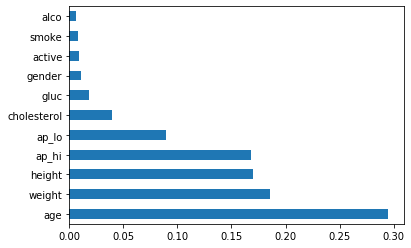

In [38]:
#plot graph for important features.
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x.shape,y.shape

((69301, 11), (69301,))

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=54)

In [41]:
import sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [42]:
model=[LDA(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),LinearSVC(),GaussianNB()]

for m in model:
    print("Model :",m ,"\n")
    
    m.fit(x_train,y_train)
    print("Model Score :",m.score(x_train,y_train) ,"\n")  
    
    predm=np.array(m.predict(x_test))
    print("Model Pediction :",predm  ,"\n")
    
    print("Confusion Matrix :","\n", confusion_matrix(y_test,predm)  ,"\n")
    
    print("Accuracy Score : ", accuracy_score(y_test,predm)  ,"\n")
    
    print("Classification Report : ", classification_report(y_test,predm) ,"\r\r\n\n\n")
    
    



Model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

Model Score : 0.7257720057720057 

Model Pediction : [1 0 0 ... 1 0 0] 

Confusion Matrix : 
 [[6841 1877]
 [2879 5729]] 

Accuracy Score :  0.725499249682558 

Classification Report :                precision    recall  f1-score   support

           0       0.70      0.78      0.74      8718
           1       0.75      0.67      0.71      8608

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.72     17326
weighted avg       0.73      0.73      0.72     17326
 



Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_s

In [44]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
predm=rc.predict(x_test)
print(predm)

[1 0 0 ... 1 0 0]


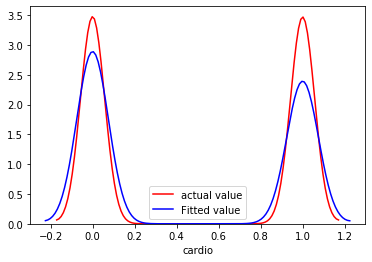

In [47]:
ax1=sns.distplot(df['cardio'],hist=False,color='r',label='actual value')

sns.distplot(predm,hist=False,color='b',label='Fitted value',ax=ax1)

In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,predm)

0.30139674477663625

In [50]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predm=lr.predict(x_test)
print(predm)

[1 0 0 ... 1 0 0]


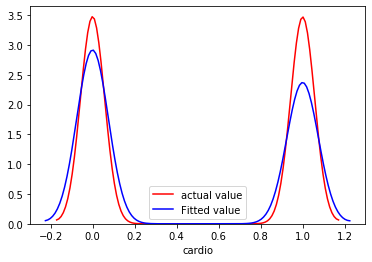

In [51]:
ax1=sns.distplot(df['cardio'],hist=False,color='r',label='actual value')

sns.distplot(predm,hist=False,color='b',label='Fitted value',ax=ax1)

In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,predm)

0.27288468198083804

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predm))

print(confusion_matrix(y_test, predm))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8718
           1       0.75      0.68      0.71      8608

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.73     17326
weighted avg       0.73      0.73      0.73     17326

[[6773 1945]
 [2783 5825]]


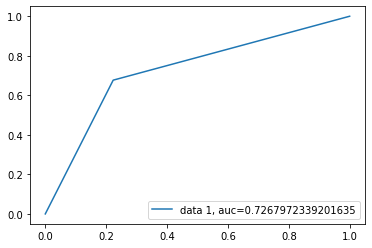

In [62]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, predm)
auc = metrics.roc_auc_score(y_test, predm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()